In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Insurance :

In [2]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:>

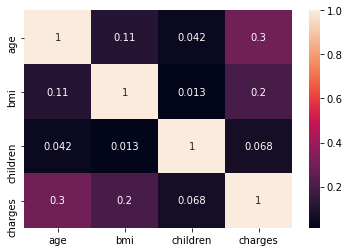

In [3]:
sns.heatmap(df.corr(), annot=True)

# Does BMI increasess based on their age ?

# Data for Training :

<AxesSubplot:ylabel='Density'>

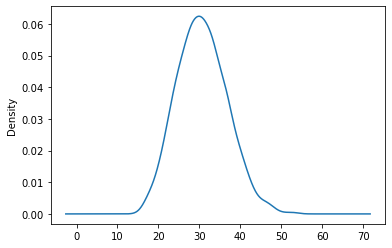

In [4]:
df['bmi'].plot.kde()

In [5]:
df_train = df[['bmi', 'age']]

In [6]:
X = df_train.iloc[:,1]

In [7]:
y = df_train.iloc[:,0]

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df_train.iloc[:, 1].values
y = df_train.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

X_train= X_train.reshape(-1, 1)
X_test = X_test.reshape(-1,1)
y_train= y_train.reshape(-1, 1)

norm = normalize(X_train, norm='l2') #Normalize data, to normally distributed

lr = LinearRegression()
lr.fit(X_train, y_train)

pred = lr.predict(X_test)

In [16]:
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_absolute_error(y_test,pred)))

RMSE : 2.166411682813541


# Galaxy Morphology :

In [17]:
df2 = pd.read_csv('GalaxyMorphology.csv')

In [18]:
df2

,Unnamed: 0,TType,K,C,A,S,G2,H,CNN2classes1stClass
0,0,1.854829,6.560199,0.357051,0.932151,0.850992,1.588183,0.697214,1
1,1,4.815538,25.950829,0.313292,0.610999,0.723122,1.533653,0.719412,1
2,2,0.678056,6.867416,0.408286,0.881524,0.813231,1.743747,0.750872,1
3,3,-0.547708,11.877941,-9999.999999,0.838779,0.816965,1.672529,0.771995,1
4,4,2.028543,20.458965,0.446453,0.839216,0.801140,1.107665,0.610453,1
...,...,...,...,...,...,...,...,...,...
19995,19995,4.631655,29.018608,0.358020,0.602471,0.832848,1.611594,0.735315,1
19996,19996,-2.179893,15.245582,0.470026,0.842624,0.868289,1.313089,0.649996,1
19997,19997,1.876151,6.907812,0.323334,0.830340,0.950820,1.406042,0.671217,1
19998,19998,5.053256,27.981613,0.393574,0.632766,0.825990,1.659363,0.379448,1


In [19]:
df2.isna().sum()

Unnamed: 0             0
TType                  0
K                      0
C                      0
A                      0
S                      0
G2                     0
H                      0
CNN2classes1stClass    0
dtype: int64

0 : galaksi elips, 
1 : galaksi spiral

In [20]:
df2_train = df2[['C', 'A','S','G2','H', 'CNN2classes1stClass']]

In [21]:
df2_train

,C,A,S,G2,H,CNN2classes1stClass
0,0.357051,0.932151,0.850992,1.588183,0.697214,1
1,0.313292,0.610999,0.723122,1.533653,0.719412,1
2,0.408286,0.881524,0.813231,1.743747,0.750872,1
3,-9999.999999,0.838779,0.816965,1.672529,0.771995,1
4,0.446453,0.839216,0.801140,1.107665,0.610453,1
...,...,...,...,...,...,...
19995,0.358020,0.602471,0.832848,1.611594,0.735315,1
19996,0.470026,0.842624,0.868289,1.313089,0.649996,1
19997,0.323334,0.830340,0.950820,1.406042,0.671217,1
19998,0.393574,0.632766,0.825990,1.659363,0.379448,1


<AxesSubplot:>

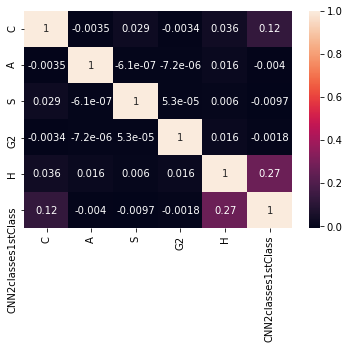

In [22]:
sns.heatmap(df2_train.corr(),annot=True)

In [23]:
bar = df2_train['CNN2classes1stClass'].value_counts()

<AxesSubplot:>

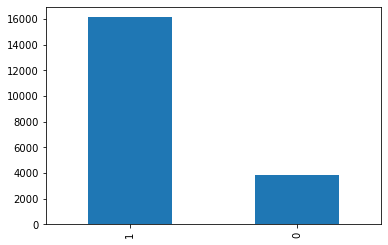

In [24]:
bar.plot.bar()

In [25]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Classification SVM (SVC) :

In [26]:
X = df2_train.iloc[:,[0,1,2,3,4]]
y = df2_train.iloc[:,5]

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
sc = StandardScaler()

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.25, random_state= 150)

In [36]:
model_svc = make_pipeline(StandardScaler(),SVC(kernel = 'rbf',gamma=20, C=15, random_state = 100))

In [37]:
model_svc.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=15, gamma=20, random_state=100))])

In [38]:
predict = model_svc.predict(X_val)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_val, predict))

              precision    recall  f1-score   support

           0       0.51      0.06      0.10       961
           1       0.81      0.99      0.89      4039

    accuracy                           0.81      5000
   macro avg       0.66      0.52      0.50      5000
weighted avg       0.76      0.81      0.74      5000



In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, predict)

array([[  54,  907],
       [  51, 3988]])

In [41]:
import collections
collections.Counter(predict)

Counter({1: 4895, 0: 105})

# Tujuan :

- Meningkatkan precision dari 0.

- Meningkatkan akurasi.

- Membuat mesin semakin notice jumlah 0 yang ada di dataset.

- Confusion Matrix memiliki nilai yg mirip secara diagonal.

# Hasil dari parameter tuning : 

# C = 20, gamma = auto, kernel = rbf, random_state = 100

Classification Report :

precision    recall  f1-score   support

           0       0.74      0.04      0.07       988
           1       0.81      1.00      0.89      4012

    accuracy                           0.81      5000
   macro avg       0.78      0.52      0.48      5000
weighted avg       0.80      0.81      0.73      5000

Jumlah :

1 : 4953, 0 : 47

Confusion Matrix :

[[  35,  953],

[  12, 4000]]

# C = 20, gamma = 10, kernel = rbf, random_state = 100

Classification Report :
 
 precision    recall  f1-score   support

           0       0.57      0.23      0.33       988
           1       0.83      0.96      0.89      4012

    accuracy                           0.81      5000
   macro avg       0.70      0.59      0.61      5000
weighted avg       0.78      0.81      0.78      5000

Jumlah :

1: 4598, 0: 402


Confusion Matrix :

[ 229,  759],

[ 173, 3839]]

# C= 100.0, gamma = 5, kernel = 'linear', random_state = 100

Classification Report :


precision    recall  f1-score   support

           0       0.00      0.00      0.00       988
           1       0.80      1.00      0.89      4012

    accuracy                           0.80      5000
   macro avg       0.40      0.50      0.45      5000
weighted avg       0.64      0.80      0.71      5000

Jumlah : 

1 : 5000, 0: 0

Confusion Matrix :

[[   0,  988],

[   0, 4012]])

# C = 25, gamma = 15, kernel = 'rbf',random_state = 100

Classification Report :

      precision    recall  f1-score   support

           0       0.54      0.26      0.35       988
           1       0.84      0.94      0.89      4012

    accuracy                           0.81      5000
   macro avg       0.69      0.60      0.62      5000
weighted avg       0.78      0.81      0.78      5000

Jumlah :

1: 4524, 0: 476

Confusion Matrix :

[[ 255,  733],

[ 221, 3791]]

# C = 20, gamma = 15, kernel = rbf, random_state = 100

precision    recall  f1-score   support

           0       0.54      0.26      0.35       988
           1       0.84      0.95      0.89      4012

    accuracy                           0.81      5000
   macro avg       0.69      0.60      0.62      5000
weighted avg       0.78      0.81      0.78      5000

Jumlah :

1: 4528, 0: 472

Confusion Matrix :

[[ 254,  734],

[ 218, 3794]]

# C= 25, gamma = 20 , kernel = rbf, random_State = 150

precision    recall  f1-score   support

           0       0.51      0.06      0.10       961
           1       0.81      0.99      0.89      4039

    accuracy                           0.81      5000
   macro avg       0.66      0.52      0.50      5000
weighted avg       0.76      0.81      0.74      5000

Jumlah :

1: 4895, 0: 105

Confusion Matrix :

[  54,  907],

[  51, 3988]]